In [220]:
from pathlib import Path
import pandas as pd
from data_processing import read_data, with_big_monthly_sessions, collect_sessions_data
from graphics import plot_session_graphic, draw, calculate_clusters

DATA_FILE = Path.cwd() / 'data' / 'trade_info.sqlite3'

In [81]:
df = read_data(DATA_FILE)
df_filtered = with_big_monthly_sessions(df)

In [121]:
data = collect_sessions_data(df_filtered)

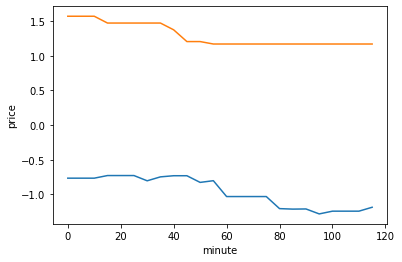

In [136]:
plot_session_graphic(data, 39)
plot_session_graphic(data, 210)

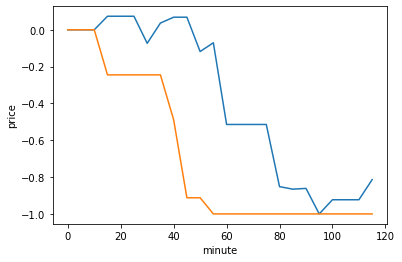

In [135]:
plot_session_graphic(data, 39, normalize=True)
plot_session_graphic(data, 210, normalize=True)

In [224]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
alg = DBSCAN(eps=0.1, min_samples=2, metric='cosine')
# alg = GaussianMixture(n_components=6, random_state=0)
clusters = calculate_clusters(data, alg)
print('There are', len(set(clusters)), 'clusters')

There are 6 clusters


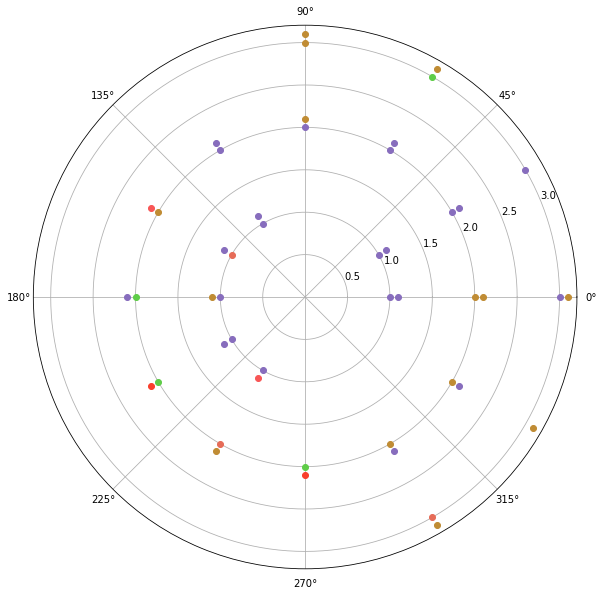

In [225]:
draw(data, df, clusters)